### Important Note:
The "Top 250 French Movies" dataset comprises information on the highest-rated French movies according to user ratings on various platforms. This dataset contains 250 unique French movies that have garnered critical acclaim and popularity among viewers. Each movie is associated with essential details, including its rank, title, release year, duration, genre, IMDb rating, image source link, and a brief description.

This dataset is intended for learning, research, and analysis purposes. The movie ratings and details provided in the dataset are based on publicly available information at the time of scraping. As IMDb ratings and movie information may change over time, it is essential to verify and update the data for the latest information.

By using this dataset, you acknowledge that the accuracy and completeness of the information cannot be guaranteed, and you assume responsibility for any analysis or decision-making based on the data. Additionally, please adhere to IMDb's terms of use and copyright policies when using the data for any public dissemination or commercial purposes.

Data Analysis Tasks:

1.Exploratory Data Analysis (EDA):
Explore the distribution of movies by genres, release years, and IMDb ratings. Visualize the top-rated French movies and their IMDb ratings using bar charts or histograms.

2.Year-wise Trends:
Observe trends in French movie production over the years using line charts or area plots. Analyze if there's any correlation between release year and IMDb ratings.

3.Word Cloud Analysis:
Create word clouds from movie descriptions to visualize the most common words and themes among the top-rated French movies. This can provide insights into popular topics and genres.

4.Network Analysis:
Build a network graph connecting French movies that share common actors or directors. Analyze the interconnectedness of movies based on their production teams.

Machine Learning Tasks:

1.Movie Recommendation System:
Implement a content-based recommendation system that suggests French movies based on similarities in genre, release year, and IMDb ratings. Use techniques like cosine similarity or Jaccard similarity to measure movie similarities.

2.Movie Genre Classification:
Build a multi-class classification model to predict the genre of an French movie based on its description. Utilize Natural Language Processing (NLP) techniques like text preprocessing, TF-IDF, or word embeddings. Use classifiers like Logistic Regression, Naive Bayes, or Support Vector Machines.

3.Movie Sentiment Analysis:
Perform sentiment analysis on movie descriptions to determine the overall sentiment (positive, negative, neutral) of each movie. Use sentiment lexicons or pre-trained sentiment analysis models.

4.Movie Rating Prediction:
Develop a regression model to predict the IMDb rating of an French movie based on features like genre, release year, and description sentiment. Employ regression algorithms like Linear Regression, Decision Trees, or Random Forests.

5.Movie Clustering:
Apply unsupervised clustering algorithms to group French movies with similar attributes. Use features like genre, IMDb rating, and release year to identify movie clusters. Experiment with algorithms like K-means clustering or hierarchical clustering.

Important Note:
Ensure that the data is appropriately preprocessed and encoded for machine learning tasks. Handle any missing values, perform feature engineering, and split the dataset into training and testing sets. Evaluate the performance of each machine learning model using appropriate metrics such as accuracy, precision, recall, or Mean Squared Error (MSE) depending on the task.

It is crucial to remember that the performance of machine learning models may vary based on the dataset's size and quality. Interpret the results carefully and consider using cross-validation techniques to assess model generalization.

Lastly, please adhere to IMDb's terms of use and any applicable data usage policies while conducting data analysis and implementing machine learning models with this dataset.

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
import string
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
import networkx as nx
from collections import Counter

In [2]:
# Load the data
imdb = pd.read_csv('imdb.csv')

In [3]:
# Dataset has 250 entries and 15 columns. Some columns have missing values
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      250 non-null    object 
 1   web-scraper-start-url  250 non-null    object 
 2   Image-src              250 non-null    object 
 3   Name                   250 non-null    object 
 4   Rank                   250 non-null    int64  
 5   Year                   250 non-null    object 
 6   Type                   228 non-null    object 
 7   Duration               250 non-null    object 
 8   Genre                  250 non-null    object 
 9   Rating                 250 non-null    float64
 10  MetaScore              138 non-null    float64
 11  Desc                   250 non-null    object 
 12  Director_Stars         250 non-null    object 
 13  Votes                  1 non-null      object 
 14  Gross                  1 non-null      object 
dtypes: flo

In [4]:
# Drop the useless columns 
imdb = imdb.drop(['web-scraper-order', 'web-scraper-start-url', 'Image-src', 'Votes', 'Gross'], axis=1)

In [5]:
imdb.head()

,Name,Rank,Year,Type,Duration,Genre,Rating,MetaScore,Desc,Director_Stars
0,Shoah,1,-1985,PG,566 min,"Documentary, History, War",8.7,99.0,Claude Lanzmann's epic documentary recounts th...,Director:\nClaude Lanzmann\n |...
1,Home,2,(I) (2009),U,118 min,Documentary,8.5,47.0,"With aerial footage from fifty-four countries,...",Director:\nYann Arthus-Bertrand\n ...
2,Untouchable,3,-2011,15,112 min,"Biography, Comedy, Drama",8.5,57.0,After he becomes a quadriplegic from a paragli...,"Directors:\nOlivier Nakache, \nÉric Toledano\n..."
3,Le Trou,4,-1960,A,131 min,"Crime, Drama, Thriller",8.5,NaN,Distrust and uncertainty arise when four long-...,Director:\nJacques Becker\n | ...
4,The Man Who Planted Trees,5,-1987,NaN,30 min,"Animation, Short, Drama",8.5,NaN,The story of a shepherd's single handed quest ...,Director:\nFrédéric Back\n | \...


In [6]:
# Check duplicates
imdb.duplicated().sum()

0

### Missing values

In [7]:
count = imdb.isnull().sum().sort_values(ascending=False)
percentage = ((imdb.isnull().sum()/len(imdb)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, 
keys = ['Count', 'Percentage'])

print('Count and percantage of missing values for the columns:')

missing_data

Count and percantage of missing values for the columns:


,Count,Percentage
MetaScore,112,44.8
Type,22,8.8
Name,0,0.0
Rank,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Desc,0,0.0
Director_Stars,0,0.0


In [8]:
'Name', 'Rank', 'Genre', 'Desc', 'Director_Stars', 'Type'

('Name', 'Rank', 'Genre', 'Desc', 'Director_Stars', 'Type')

In [9]:
print(imdb['Type'].value_counts())
print(imdb['MetaScore'].value_counts())

Type
15       63
U        28
A        28
X        27
PG       26
12A      15
12       14
18       14
AA       10
PG-13     2
R         1
Name: count, dtype: int64
MetaScore
82.0     7
73.0     7
86.0     7
87.0     6
92.0     4
79.0     4
70.0     4
71.0     4
89.0     4
94.0     4
90.0     4
99.0     4
74.0     4
85.0     4
66.0     3
91.0     3
75.0     3
98.0     3
72.0     3
77.0     3
80.0     3
84.0     3
81.0     3
93.0     3
56.0     3
83.0     3
95.0     3
61.0     3
57.0     2
59.0     2
67.0     2
78.0     2
97.0     2
76.0     2
96.0     2
69.0     2
100.0    2
88.0     2
35.0     1
60.0     1
45.0     1
62.0     1
47.0     1
51.0     1
53.0     1
64.0     1
65.0     1
Name: count, dtype: int64


### Weighted Imputation

In [10]:
# Calculate the weights based on value frequencies for 'Type'
value_counts_type = imdb['Type'].value_counts()
weights_type = value_counts_type / value_counts_type.sum()

# Calculate the weights based on value frequencies for 'MetaScore'
value_counts_metascore = imdb['MetaScore'].value_counts()
weights_metascore = value_counts_metascore / value_counts_metascore.sum()

# Create an array of unique values with their corresponding weights for 'Type'
unique_values_type = weights_type.index.tolist()
unique_weights_type = weights_type.values.tolist()

# Create an array of unique values with their corresponding weights for 'MetaScore'
unique_values_metascore = weights_metascore.index.tolist()
unique_weights_metascore = weights_metascore.values.tolist()

# Create masks for missing values in both columns
type_mask = imdb['Type'].isnull()
metascore_mask = imdb['MetaScore'].isnull()

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random imputations based on weights for 'Type'
imputations_type = np.random.choice(unique_values_type, size=type_mask.sum(), p=unique_weights_type)

# Generate random imputations based on weights for 'MetaScore'
imputations_metascore = np.random.choice(unique_values_metascore, size=metascore_mask.sum(), p=unique_weights_metascore)

# Create a copy of the DataFrame to avoid modifying the original data
imdb_imputed = imdb.copy()

# Assign the imputations to the missing values in the copy DataFrame for 'Type'
imdb_imputed.loc[type_mask, 'Type'] = imputations_type

# Assign the imputations to the missing values in the copy DataFrame for 'MetaScore'
imdb_imputed.loc[metascore_mask, 'MetaScore'] = imputations_metascore

# Verify the imputed values for 'Type'
imputed_values_type = imdb_imputed['Type'].loc[type_mask]
print("Imputed values for 'Type':")
print(imputed_values_type)

# Verify the imputed values for 'MetaScore'
imputed_values_metascore = imdb_imputed['MetaScore'].loc[metascore_mask]
print("Imputed values for 'MetaScore':")
print(imputed_values_metascore)

# Update the original DataFrame with the imputed values for 'Type'
imdb['Type'].update(imdb_imputed['Type'])

# Update the original DataFrame with the imputed values for 'MetaScore'
imdb['MetaScore'].update(imdb_imputed['MetaScore'])

Imputed values for 'Type':
4       U
41     AA
82     PG
117     X
137    15
140    15
141    15
153    12
183     X
186    PG
196    15
197    AA
199    12
205    15
215    15
219    15
221     U
224     X
230     A
232     U
245     X
246    15
Name: Type, dtype: object
Imputed values for 'MetaScore':
3      71.0
4      94.0
8      74.0
9      61.0
10     92.0
       ... 
232    91.0
233    99.0
234    92.0
242    86.0
245    89.0
Name: MetaScore, Length: 112, dtype: float64


In [11]:
print(imdb['Type'].value_counts())
print(imdb['MetaScore'].value_counts())

Type
15       71
U        31
X        31
A        29
PG       28
12       16
12A      15
18       14
AA       12
PG-13     2
R         1
Name: count, dtype: int64
MetaScore
73.0     14
82.0     14
86.0     14
89.0     11
87.0     10
91.0      8
71.0      8
61.0      8
92.0      8
79.0      7
70.0      7
59.0      7
99.0      7
74.0      7
80.0      7
94.0      7
75.0      6
56.0      5
95.0      5
85.0      5
77.0      5
90.0      5
83.0      5
69.0      5
66.0      5
100.0     4
57.0      4
76.0      4
81.0      4
72.0      4
88.0      4
98.0      4
93.0      4
96.0      3
47.0      3
84.0      3
67.0      3
97.0      3
78.0      2
64.0      2
35.0      2
60.0      2
62.0      1
45.0      1
51.0      1
53.0      1
65.0      1
Name: count, dtype: int64


In [12]:
imdb.isnull().sum()

Name              0
Rank              0
Year              0
Type              0
Duration          0
Genre             0
Rating            0
MetaScore         0
Desc              0
Director_Stars    0
dtype: int64

### Summary Statistics

In [13]:
# Describe 
imdb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,250,250,Shoah,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,250.0,NaN,NaN,NaN,125.5,72.312977,1.0,63.25,125.5,187.75,250.0
Year,250,80,-2005,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,250,11,15,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,250,83,105 min,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,250,73,Drama,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,250.0,NaN,NaN,NaN,7.6212,0.284807,7.2,7.4,7.6,7.8,8.7
MetaScore,250.0,NaN,NaN,NaN,79.064,13.126352,35.0,71.0,81.0,89.0,100.0
Desc,250,250,Claude Lanzmann's epic documentary recounts th...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director_Stars,250,250,Director:\nClaude Lanzmann\n |...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
imdb['Year'].unique()

array(['-1985', '(I) (2009)', '-2011', '-1960', '-1987', '-1945', '-2001',
       '-2010', '-1962', '-1956', '-1902', '-1969', '-1995', '-1959',
       '-1994', '-2019', '-1953', '-1966', '(I) (2014)', '-1928', '-1967',
       '-1937', '-1955', '-2007', '-1952', '-1939', '-1986', '-1970',
       '-1958', '-1973', '-1983', '-1950', '-1963', '(I) (2011)', '-2009',
       '-2012', '-1993', '-2004', '-1972', '-2005', '-1946', '-1977',
       '-1974', '-1951', '-2017', '-1943', '-1980', '-2003', '-2013',
       '-1991', '-1964', '-2016', '-1961', '-1934', '-1938', '-2002',
       '-1996', '-1975', '-1954', '-1947', '-1929', '-1976', '-1998',
       '-1968', '-1971', '-2000', '-1992', '-1981', '-1988', '-1965',
       '-2008', '-1999', '-1982', '-1990', '-1989', '-2006', '-1997',
       '-1979', '-1932', '-2014'], dtype=object)

In [15]:
# Extract and clean the years using regular expressions
imdb['Year'] = imdb['Year'].apply(lambda x: re.search(r'\d{4}', x).group() if re.search(r'\d{4}', x) else None)

print(imdb['Year'].unique())

['1985' '2009' '2011' '1960' '1987' '1945' '2001' '2010' '1962' '1956'
 '1902' '1969' '1995' '1959' '1994' '2019' '1953' '1966' '2014' '1928'
 '1967' '1937' '1955' '2007' '1952' '1939' '1986' '1970' '1958' '1973'
 '1983' '1950' '1963' '2012' '1993' '2004' '1972' '2005' '1946' '1977'
 '1974' '1951' '2017' '1943' '1980' '2003' '2013' '1991' '1964' '2016'
 '1961' '1934' '1938' '2002' '1996' '1975' '1954' '1947' '1929' '1976'
 '1998' '1968' '1971' '2000' '1992' '1981' '1988' '1965' '2008' '1999'
 '1982' '1990' '1989' '2006' '1997' '1979' '1932']


<Axes: xlabel='count'>

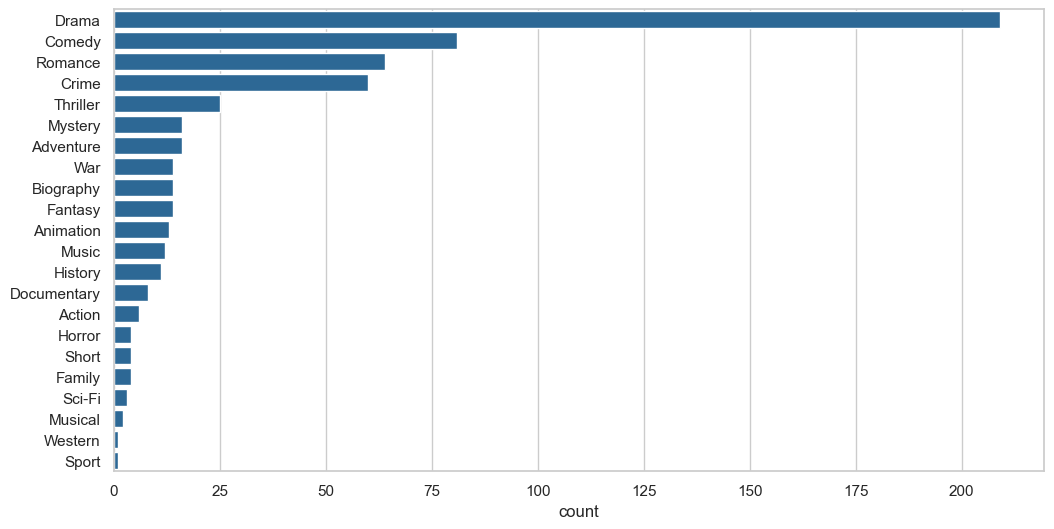

In [16]:
# Split the 'Genre' column into multiple genres
imdb['Genres'] = imdb['Genre'].str.split(', ')

# Create a DataFrame to count the frequency of each genre
genre_counts = pd.Series([genre for sublist in imdb['Genres'] for genre in sublist])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_counts, y=genre_counts, color="#1C6AA6", order=genre_counts.value_counts().index)

### Distribution of ratings

<Axes: xlabel='Rating', ylabel='count'>

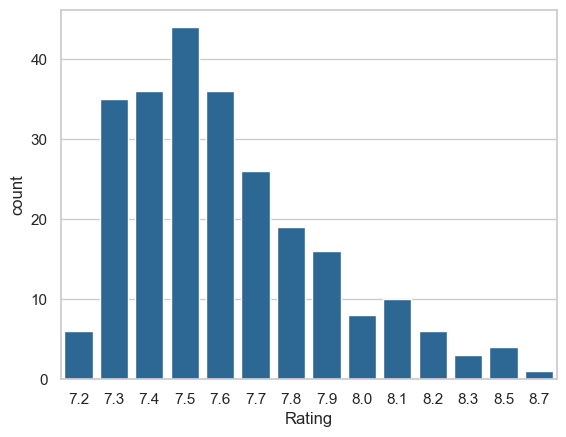

In [17]:
sns.countplot(data=imdb, x="Rating", color = '#1C6AA6')

### Top-rated French movies and their IMDb ratings 

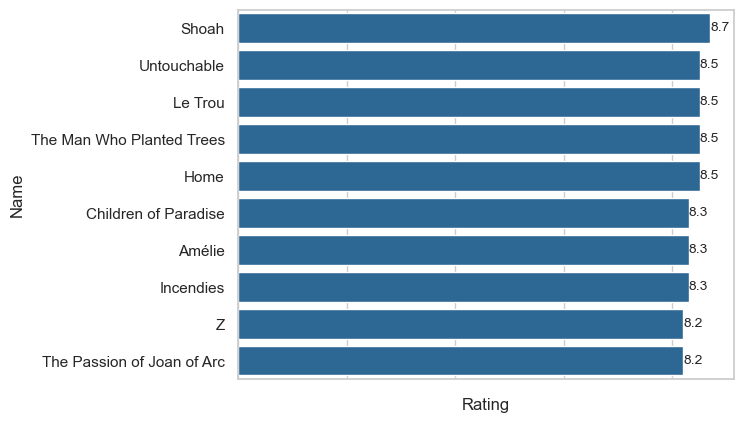

In [18]:
top_rated_french_movies = imdb.sort_values(by='Rating', ascending=False).head(10)
sns.set(style="whitegrid")

ax = sns.barplot(top_rated_french_movies, x="Rating", y="Name", color="#1C6AA6", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xticklabels([])
plt.show()

### Distribution of release years

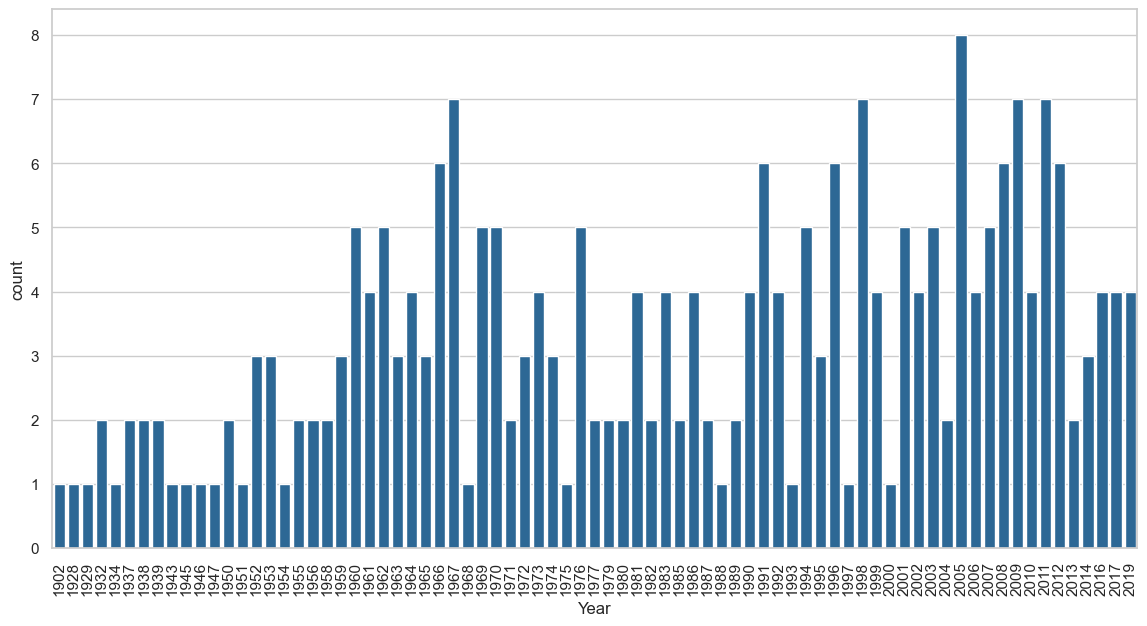

In [19]:
plt.figure(figsize=(14, 7))

sort_years = imdb.sort_values(by='Year', ascending=True)

sns.countplot(data=sort_years, x="Year", color="#1C6AA6")
plt.xticks(rotation=90) 
plt.show()

### Year-wise Trends (Correlation between Year and, IMDB rating)

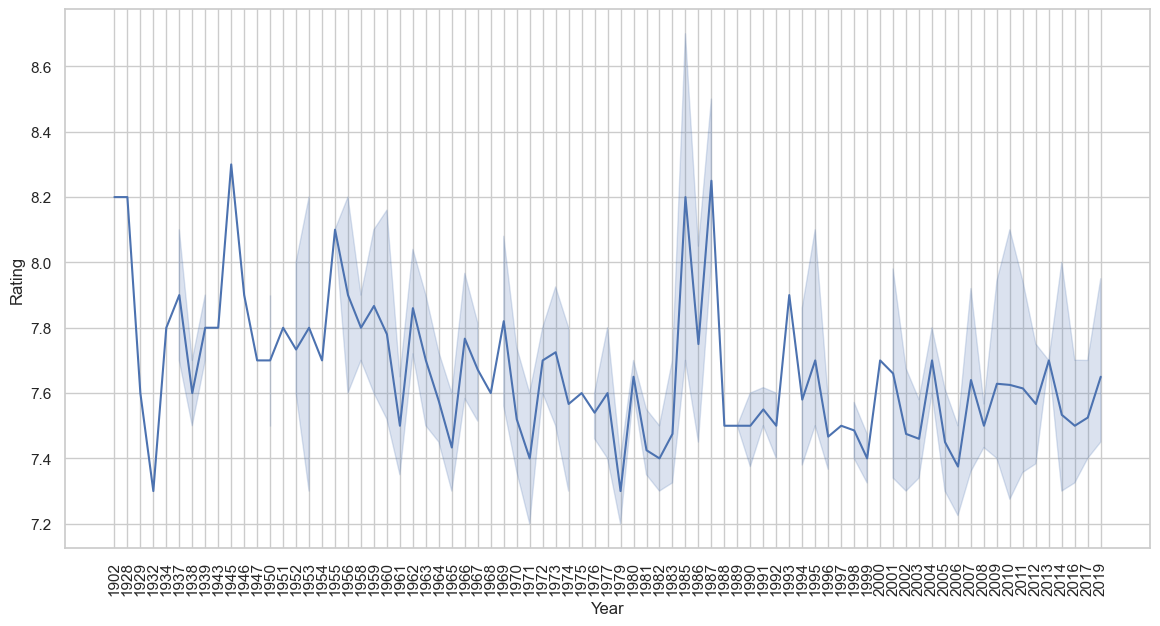

In [20]:
year_rating = imdb.sort_values(by='Year', ascending=True)

plt.figure(figsize=(14,7))

sns.lineplot(data=year_rating, x="Year", y="Rating")
plt.xticks(rotation=90)
plt.show()

### Description Word Cloud Analysis

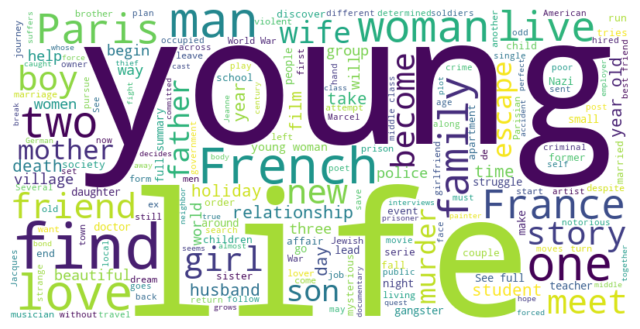

In [21]:
# Concatenate all movie descriptions into a single string
all_descriptions = ' '.join(imdb['Desc'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sentimental Analysis 

### Lower case

In [22]:
lower_case = imdb['Desc'].str.lower()

In [23]:
lower_case

0      claude lanzmann's epic documentary recounts th...
1      with aerial footage from fifty-four countries,...
2      after he becomes a quadriplegic from a paragli...
3      distrust and uncertainty arise when four long-...
4      the story of a shepherd's single handed quest ...
                             ...                        
245    the life of octave parango, a flamboyant ad de...
246    vincent is about to become a father. at a meet...
247    she is almost deaf and he lip-reads. he is an ...
248    a journalist covering police assigned to a juv...
249    in paris, a turkish shop owner befriends a jew...
Name: Desc, Length: 250, dtype: object

### Remove the punctuations

In [24]:
# Review all the punctuations.
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
cleaned_text = lower_case.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print(cleaned_text)

0      claude lanzmanns epic documentary recounts the...
1      with aerial footage from fiftyfour countries h...
2      after he becomes a quadriplegic from a paragli...
3      distrust and uncertainty arise when four longt...
4      the story of a shepherds single handed quest t...
                             ...                        
245    the life of octave parango a flamboyant ad des...
246    vincent is about to become a father at a meeti...
247    she is almost deaf and he lipreads he is an ex...
248    a journalist covering police assigned to a juv...
249    in paris a turkish shop owner befriends a jewi...
Name: Desc, Length: 250, dtype: object


### Tokenization

In [48]:
%%capture

tokenized_words = cleaned_text.str.split()

for words_list in tokenized_words:
    for word in words_list:
        print(f"'{word}'")

### Stop words

In [49]:
%%capture

stop_words = set()
with open("stopwords", "r") as file:
    for line in file:
        stop_words.add(line.strip())

filtered_words = []

for words_list in tokenized_words:
    for word in words_list:
        if word not in stop_words:
            filtered_words.append(word)

print(filtered_words)

In [28]:
emotion_list = []
with open('emotions.txt', 'r') as file: 
    for line in file: 
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        #print("Word :" + word + " " + "Emotion :" + emotion)
        
        if word in filtered_words: 
            emotion_list.append(emotion)
print(emotion_list)

[' cheated', ' angry', ' sad', ' bored', ' attracted', ' attached', ' fearless', ' attracted', ' sad', ' focused', ' demoralized', ' sad', ' sad', ' powerless', ' free', ' happy', ' sad', ' entitled', ' attracted', ' alone', ' attracted', ' bored', ' alone', ' attached', ' attracted', ' obsessed', ' sad', ' average', ' sad', ' adequate', ' sad', ' fearful', ' derailed', ' sad', ' entitled', ' fearful', ' happy', ' fearful', ' hated', ' powerless', ' codependent', ' alone', ' focused', ' happy', ' happy', ' loved', ' anxious', ' entitled', ' sad']


In [29]:
w = Counter(emotion_list)
print(w)

Counter({' sad': 10, ' attracted': 5, ' happy': 4, ' entitled': 3, ' alone': 3, ' fearful': 3, ' bored': 2, ' attached': 2, ' focused': 2, ' powerless': 2, ' cheated': 1, ' angry': 1, ' fearless': 1, ' demoralized': 1, ' free': 1, ' obsessed': 1, ' average': 1, ' adequate': 1, ' derailed': 1, ' hated': 1, ' codependent': 1, ' loved': 1, ' anxious': 1})


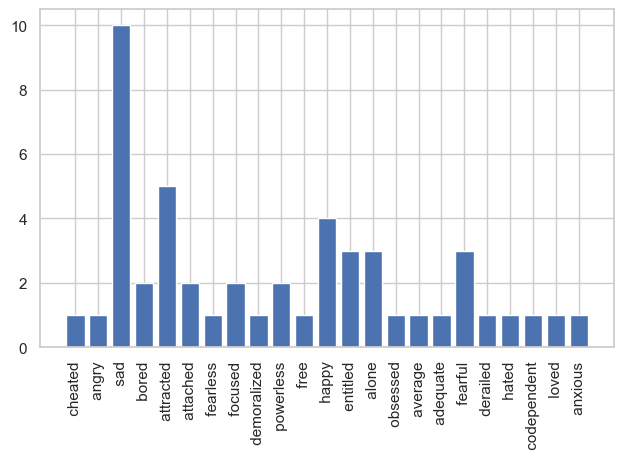

In [30]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
plt.xticks(range(len(w)), rotation=90)
fig.tight_layout()
plt.savefig('graph.png')
plt.show()

In [50]:
import plotly.express as px

# Assuming 'imdb' is your DataFrame with movie data
top_rated_french_movies = imdb.sort_values(by='Rating', ascending=False).head(10)

# Create an interactive bar plot with Plotly Express
fig = px.bar(top_rated_french_movies, x='Rating', y='Name', color='Rating', orientation='h',
             labels={'Name': 'Movie Name', 'Rating': 'IMDb Rating'},
             title='Top 10 Rated French Movies')

# Show the plot
fig.show()